In [36]:
#The directive "%" talks to Jupter Notebook directly
#matplotlib inline will embedd matplotlib graphs nicely within the code cells

%matplotlib inline

In [37]:
#current path:
import os
#xml tool:
import xml.etree.ElementTree as ET



#import keras
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image

In [38]:
#Load xml file
#-------------

#define working path
PATH = os.getcwd()

#path to xml file: (must be within PATH)
path_xml = './annotations/xmls/Abyssinian_1.xml'

#fetch xml:
Abyssinian1 = ET.parse(path_xml)

#fetch the root of the xml:
root_Abyssinian1 = Abyssinian1.getroot()

In [39]:
#Name of the very first tag of the XML Tree; the root of the tree
print("Very first tag:\n", root_Abyssinian1.tag)

Very first tag:
 annotation


In [40]:
#Print out all children from root:
print("All children from root:\n")
for child in root_Abyssinian1:
    print(child.tag)
#the tag is the name of the child objects
#this only prints the top-level children and not any further childrens children 


All children from root:

folder
filename
source
size
segmented
object


In [41]:
#Output all elements of xml file
#-------------------------------

#Print out all elements of the tree;
#Iterate through the xml tree; 
#all objects, may it be children, or childrens children, are printed:
print("All elements in tree:\n")
for elem in root_Abyssinian1.iter():
    print(elem.tag)

All elements in tree:

annotation
folder
filename
source
database
annotation
image
size
width
height
depth
segmented
object
name
pose
truncated
occluded
bndbox
xmin
ymin
xmax
ymax
difficult


In [42]:
#Grab specific values from xml file and store them in variables
#-------------------------------------------------------------

#Search for element bndbox within the xml, and within bndbox search for child elements;
#save the text content: child_elem.find('NAME_OF_CHILDELEMENT') as text and turn the string into a float number

for child_elem in root_Abyssinian1.iter('bndbox'):
    
    xmin = float(child_elem.find('xmin').text)
    ymin = float(child_elem.find('ymin').text)
    xmax = float(child_elem.find('xmax').text)
    ymax = float(child_elem.find('ymax').text)
    
    print(xmin, ymin, xmax, ymax)
    


333.0 72.0 425.0 158.0


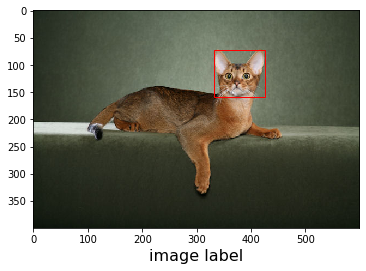

In [43]:
#Draw bounding box around bounding box coordinates
#-------------------------------------------------

#import Python Image Library (PIL):
from PIL import Image
#import numpy:
import numpy as np
from numpy import asarray
#import matplotlib:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


#path to image; must be within PATH
path_image = './images/Abyssinian_1.jpg'

#Load image and store as array:
im = np.array(Image.open(path_image))

#Create figure and axes
#Polar Subplot with
#x-Axis running from left to right
#y-Axis running from top to bottom
fig,ax = plt.subplots(1)

#Display the image:
ax.imshow(im)

#Create a Rectangle box
#Format((x,y), width, height), where (x,y) is the coordinate of the top left bounding box corner
#general format: ((xmin, ymin), xmax-xmin, ymax-ymin)
#facecolor:'none', in order to not fill the rectangular patch
rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes:
ax.add_patch(rect)

#Set a label to the image:
ax.set_xlabel('image label', fontsize=16)

#keep out all irrelevant stuff:
plt.show()